# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


In [3]:
# #TEST RESPONSE OUTPUT TO CHECK FOR VARIABLE IN JSON DOC
# url = "https://api.openweathermap.org/data/2.5/weather?"
# citytry = ["faya", "farsund"]
# city_data = []
# units="metric"

# for city in citytry:
#     city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
#     response = requests.get(city_url).json()
#     pprint(response)


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

units="metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
     
 
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | half moon bay
Processing Record 3 of Set 1 | ponta do sol
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | japura
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | badlan
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | wamba
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | solovetskiy
City not found. Skipping...
Processing Record 15 of Set 1 | umba
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | mahibadhoo
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | zastron
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | mogap

Processing Record 34 of Set 4 | airai
Processing Record 35 of Set 4 | tasiilaq
Processing Record 36 of Set 4 | barcelos
Processing Record 37 of Set 4 | olafsvik
Processing Record 38 of Set 4 | kupang
Processing Record 39 of Set 4 | umm kaddadah
Processing Record 40 of Set 4 | luderitz
Processing Record 41 of Set 4 | port elizabeth
Processing Record 42 of Set 4 | faanui
Processing Record 43 of Set 4 | chiang rai
Processing Record 44 of Set 4 | vaitape
Processing Record 45 of Set 4 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 46 of Set 4 | bacolod
Processing Record 47 of Set 4 | shingu
Processing Record 48 of Set 4 | pangai
Processing Record 49 of Set 4 | sokur
Processing Record 0 of Set 5 | karratha
Processing Record 1 of Set 5 | tiksi
Processing Record 2 of Set 5 | vestmannaeyjar
Processing Record 3 of Set 5 | hambantota
Processing Record 4 of Set 5 | upernavik
Processing Record 5 of Set 5 | laguna
Processing Record 6 of Set 5 | masjed-e soleyman
City not found. S

Processing Record 22 of Set 8 | bauchi
Processing Record 23 of Set 8 | ketchikan
Processing Record 24 of Set 8 | uarini
Processing Record 25 of Set 8 | verkhniye tatyshly
Processing Record 26 of Set 8 | sheridan
Processing Record 27 of Set 8 | paredon
Processing Record 28 of Set 8 | keti bandar
Processing Record 29 of Set 8 | issia
Processing Record 30 of Set 8 | khandyga
Processing Record 31 of Set 8 | turukhansk
Processing Record 32 of Set 8 | sistranda
Processing Record 33 of Set 8 | sayyan
Processing Record 34 of Set 8 | port-gentil
Processing Record 35 of Set 8 | cheyenne
Processing Record 36 of Set 8 | haifa
Processing Record 37 of Set 8 | bilma
Processing Record 38 of Set 8 | vanavara
Processing Record 39 of Set 8 | chapleau
Processing Record 40 of Set 8 | sakakah
Processing Record 41 of Set 8 | isabela
Processing Record 42 of Set 8 | cabedelo
Processing Record 43 of Set 8 | fairbanks
Processing Record 44 of Set 8 | maniitsoq
Processing Record 45 of Set 8 | mattru
Processing Rec

Processing Record 11 of Set 12 | rio grande
Processing Record 12 of Set 12 | nizhnevartovsk
Processing Record 13 of Set 12 | takoradi
Processing Record 14 of Set 12 | sokolo
Processing Record 15 of Set 12 | hami
Processing Record 16 of Set 12 | kiunga
Processing Record 17 of Set 12 | lohardaga
Processing Record 18 of Set 12 | silikatnyy
Processing Record 19 of Set 12 | constitucion
Processing Record 20 of Set 12 | neuquen
Processing Record 21 of Set 12 | porangatu
Processing Record 22 of Set 12 | puro
Processing Record 23 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 24 of Set 12 | pop
Processing Record 25 of Set 12 | jaisalmer
Processing Record 26 of Set 12 | xuzhou
Processing Record 27 of Set 12 | mogadishu
Processing Record 28 of Set 12 | talaya
Processing Record 29 of Set 12 | korem
Processing Record 30 of Set 12 | tuatapere
Processing Record 31 of Set 12 | bodden town
Processing Record 32 of Set 12 | fayaoue
Processing Record 33 of Set 12 | nushki
Processing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dikson,73.5069,80.5464,-2.03,85,100,5.93,RU,1682168470
1,half moon bay,37.4636,-122.4286,12.95,90,100,6.17,US,1682168470
2,ponta do sol,32.6667,-17.1000,21.35,69,100,0.72,PT,1682168471
3,barrow,71.2906,-156.7887,-20.99,84,0,5.66,US,1682168471
4,japura,-0.3167,102.3500,24.63,96,100,1.36,ID,1682168472


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-2.03,85,100,5.93,RU,1682168470
1,half moon bay,37.4636,-122.4286,12.95,90,100,6.17,US,1682168470
2,ponta do sol,32.6667,-17.1000,21.35,69,100,0.72,PT,1682168471
3,barrow,71.2906,-156.7887,-20.99,84,0,5.66,US,1682168471
4,japura,-0.3167,102.3500,24.63,96,100,1.36,ID,1682168472


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

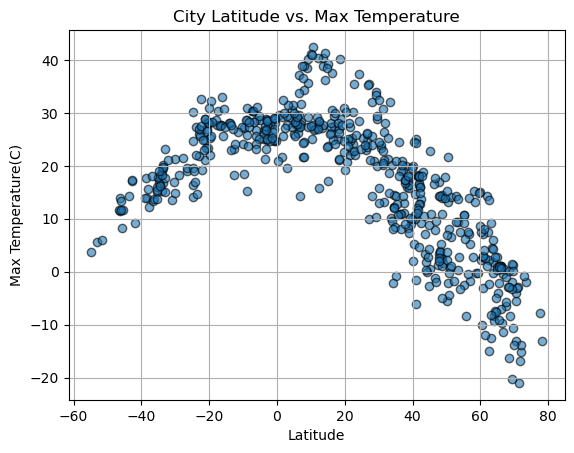

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], 
            alpha=0.6, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Latitude vs. Max Temperature")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

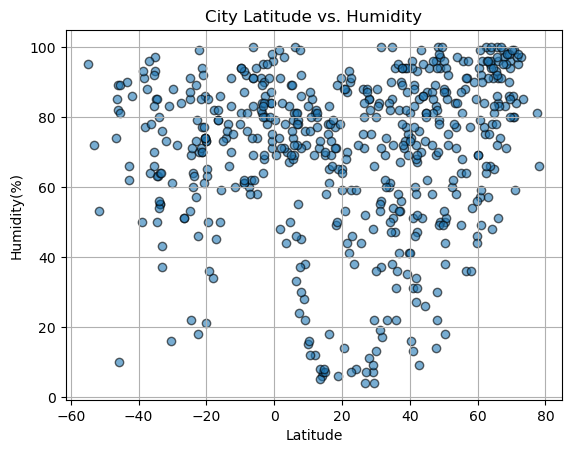

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], 
            alpha=0.6, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs. Humidity")

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

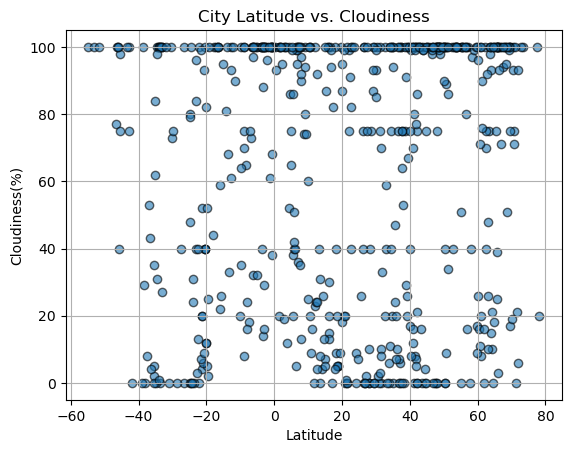

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], 
            alpha=0.6, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs. Cloudiness")

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

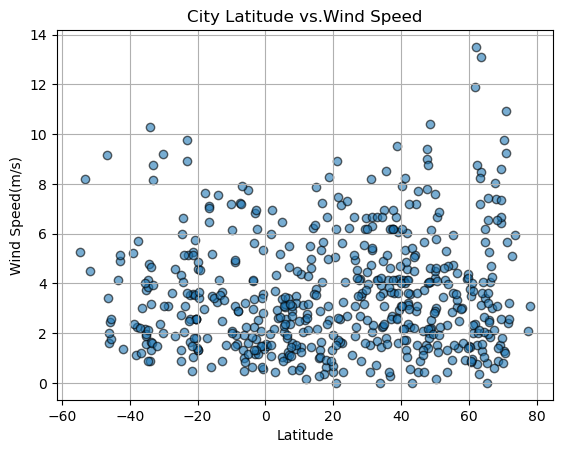

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], 
            alpha=0.6, edgecolors="black")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Latitude vs.Wind Speed")


# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
#regress_values = (x*slope) + intercept
#line_equation = "y= " + str(round(slope),2) + "x + " + str(round(intercept),2)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dikson,73.5069,80.5464,-2.03,85,100,5.93,RU,1682168470
1,half moon bay,37.4636,-122.4286,12.95,90,100,6.17,US,1682168470
2,ponta do sol,32.6667,-17.1000,21.35,69,100,0.72,PT,1682168471
3,barrow,71.2906,-156.7887,-20.99,84,0,5.66,US,1682168471
5,klaksvik,62.2266,-6.5890,7.51,75,100,13.51,FO,1682168472


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,japura,-0.3167,102.3500,24.63,96,100,1.36,ID,1682168472
6,ahipara,-35.1667,173.1667,17.61,93,84,3.74,NZ,1682168473
10,atuona,-9.8000,-139.0333,27.10,81,35,6.15,PF,1682168475
12,ushuaia,-54.8000,-68.3000,3.76,95,100,5.26,AR,1682168477
14,mataura,-46.1927,168.8643,11.38,89,100,1.60,NZ,1682168478


###  Temperature vs. Latitude Linear Regression Plot

R-value is 0.7435701130912024


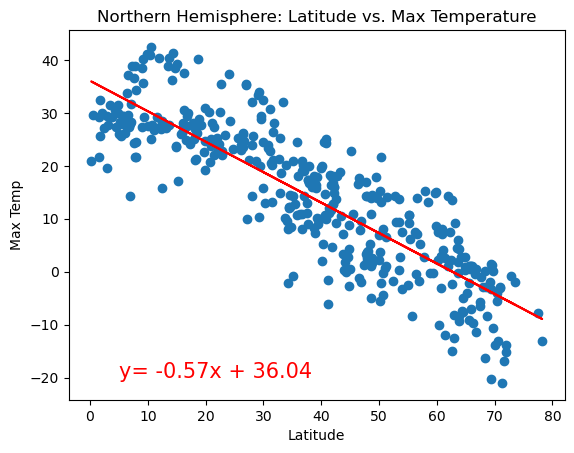

In [16]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = (x*slope) + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_equation, (5,-20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere: Latitude vs. Max Temperature")

print(f"R-value is {rvalue**2}")

plt.show()

R-value is 0.6235233496992404


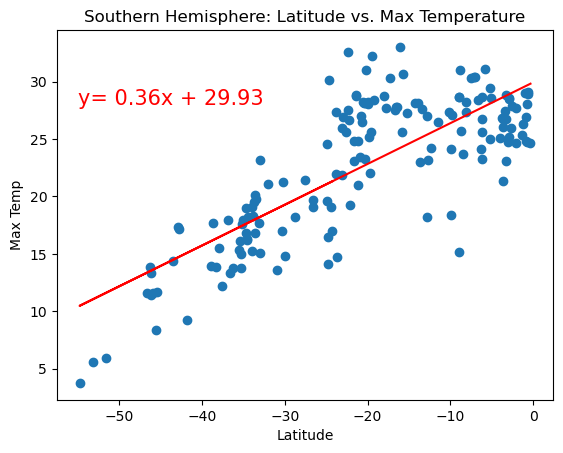

In [17]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = (x*slope) + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_equation, (-55,28),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere: Latitude vs. Max Temperature")

print(f"R-value is {rvalue**2}")

plt.show()

### Discussion about the linear relationship: 

The relationship of temperature both hemisphere is quite linear with latitude as can be seen from r squared value is closer towards value 1.  This is match with the fact that as latitude increases, temperature decreases because it is closer to Arctic. 

### Humidity vs. Latitude Linear Regression Plot

R-value is 0.08435657032136247


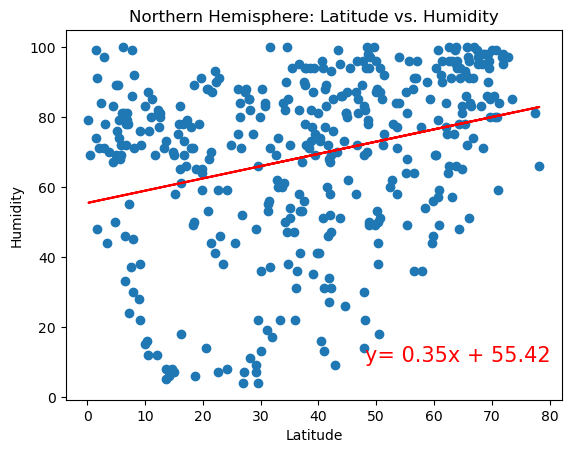

In [18]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = (x*slope) + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_equation, (48,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere: Latitude vs. Humidity")

print(f"R-value is {rvalue**2}")

plt.show()

R-value is 0.03246742081116631


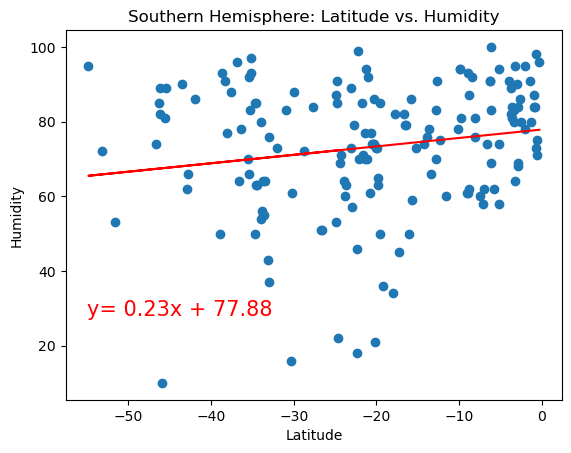

In [19]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = (x*slope) + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_equation, (-55,28),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere: Latitude vs. Humidity")

print(f"R-value is {rvalue**2}")

plt.show()

### Discussion about the linear relationship:

Humidity has very low relationship with latitude for both hemisphere, as their r-squared value are relatively lower than 0.1


### Cloudiness vs. Latitude Linear Regression Plot

R-value is 0.015913789013799588


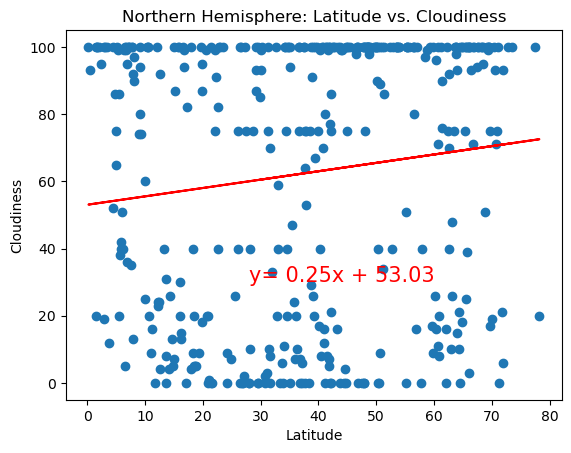

In [20]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = (x*slope) + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_equation, (28,30),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere: Latitude vs. Cloudiness")

print(f"R-value is {rvalue**2}")

plt.show()

R-value is 0.024138424848140792


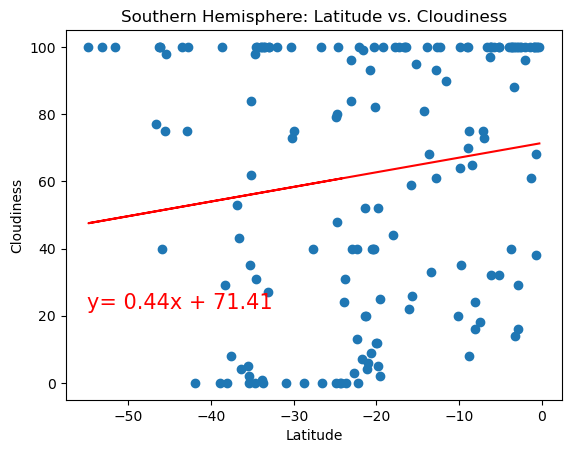

In [21]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = (x*slope) + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_equation, (-55,22),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere: Latitude vs. Cloudiness")

print(f"R-value is {rvalue**2}")

plt.show()

### Discussion about the linear relationship:
There is no relationship of cloudiness with latitude as their r-squared value both are below 0.1

### Wind Speed vs. Latitude Linear Regression Plot

R-value is 0.023124369131134408


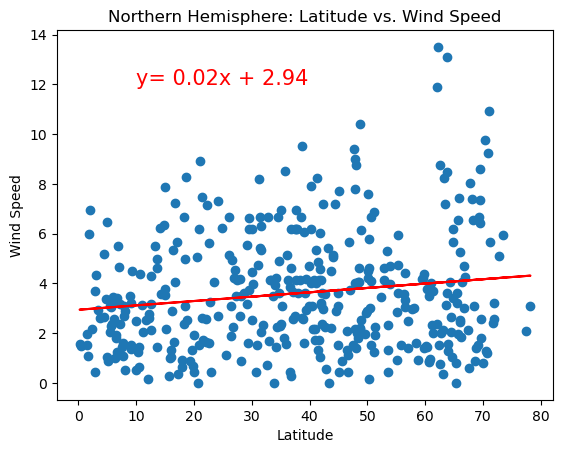

In [22]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = (x*slope) + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_equation, (10,12),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")

print(f"R-value is {rvalue**2}")

plt.show()

R-value is 0.012609547794550134


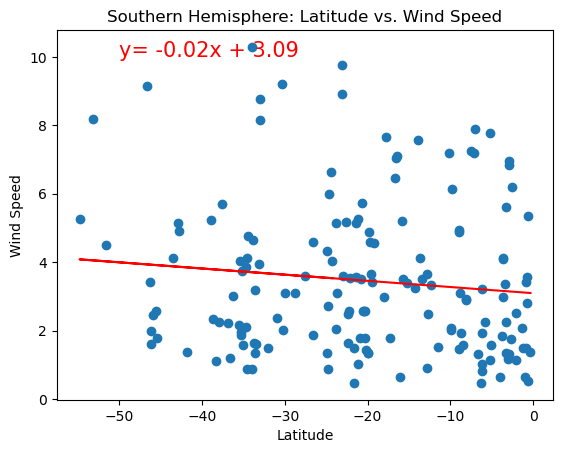

In [23]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = (x*slope) + intercept
line_equation = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_equation, (-50,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")

print(f"R-value is {rvalue**2}")

plt.show()

### Discussion about the linear relationship:
There is also no relationship between latitude and windspeed as their r-squared value is relatively lower than 0.1